In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt

In [2]:
OJ = pd.read_csv("OJ.csv")

In [3]:
OJ.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [4]:
OJ_target = OJ.Purchase

In [5]:
OJ_predictor = OJ.drop(["Purchase", "Store7"], axis = 1)

In [6]:
OJ_target.unique()

array(['CH', 'MM'], dtype=object)

Citrus Hill or Minute Maid

In [7]:
predictor_train,predictor_test,target_train,target_test=train_test_split(OJ_predictor,OJ_target,test_size=0.2)

A) 
<br>Fit  a  support  vector  classifier  with  varying  cost  parameters  over  the  range [0.01, 10].<br> Plot the training and test error across this spectrum of cost parameters, and determine the optimal cost.

In [18]:
def questionA():
    cost_list = np.linspace(0.01, 10, 20)
    score_list = []
    max_cost = 0.01
    max_score = 0.6215113920467946

    for i in cost_list:
        cost = round(i, 2)
        cv_level = 10
        svc = svm.SVC(C = cost, gamma = "auto")
        svc.fit(predictor_train, target_train)
    #     prediction = svc.predict(predictor_test)
    #     prediction = accuracy_score(target_test,prediction)
    #     print("Cost : " + str(i) + ", Prediction : " + str(prediction))
        score = cross_val_score(svc, predictor_train, target_train, cv= cv_level)
        score = sum(score)/cv_level
        score_list.append(score)
        print("Cost : " + str(cost) + ", Prediction : " + str(score))

        if score > max_score:
            max_score = score
            max_cost = i
    print("Max Score " + str(max_score) + " , max_cost " + str(max_cost ))
    plt.plot(cost_list, score_list)
    plt.savefig("Q3_a.png")
    

    
    

Cost : 0.01, Prediction : 0.6098281365473213
Cost : 0.54, Prediction : 0.7007649731905593
Cost : 1.06, Prediction : 0.7335833451263425
Cost : 1.59, Prediction : 0.7545972294290612
Cost : 2.11, Prediction : 0.7686060663238832
Cost : 2.64, Prediction : 0.7790724405239241
Cost : 3.16, Prediction : 0.7837646429863044
Cost : 3.69, Prediction : 0.7872530150793275
Cost : 4.22, Prediction : 0.7884294856675629
Cost : 4.74, Prediction : 0.7837780083966225
Cost : 5.27, Prediction : 0.7849818387659795
Cost : 5.79, Prediction : 0.7838187335880623
Cost : 6.32, Prediction : 0.7884705253392456
Cost : 6.85, Prediction : 0.7907693759139581
Cost : 7.37, Prediction : 0.7931223170904287
Cost : 7.9, Prediction : 0.7907423306130792
Cost : 8.42, Prediction : 0.7942446970769061
Cost : 8.95, Prediction : 0.7942583769674669
Cost : 9.47, Prediction : 0.7966110036636949
Cost : 10.0, Prediction : 0.8013032061260752
Max Score 0.8013032061260752 , max_cost 10.0


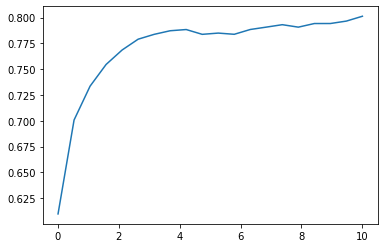

In [19]:
questionA()

Cost : 0.01, Prediction : 0.6098281365473213<br>
Cost : 0.54, Prediction : 0.7007649731905593<br>
Cost : 1.06, Prediction : 0.7335833451263425<br>
Cost : 1.59, Prediction : 0.7545972294290612<br>
Cost : 2.11, Prediction : 0.7686060663238832<br>
Cost : 2.64, Prediction : 0.7790724405239241<br>
Cost : 3.16, Prediction : 0.7837646429863044<br>
Cost : 3.69, Prediction : 0.7872530150793275<br>
Cost : 4.22, Prediction : 0.7884294856675629<br>
Cost : 4.74, Prediction : 0.7837780083966225<br>
Cost : 5.27, Prediction : 0.7849818387659795<br>
Cost : 5.79, Prediction : 0.7838187335880623<br>
Cost : 6.32, Prediction : 0.7884705253392456<br>
Cost : 6.85, Prediction : 0.7907693759139581<br>
Cost : 7.37, Prediction : 0.7931223170904287<br>
Cost : 7.9, Prediction : 0.7907423306130792<br>
Cost : 8.42, Prediction : 0.7942446970769061<br>
Cost : 8.95, Prediction : 0.7942583769674669<br>
Cost : 9.47, Prediction : 0.7966110036636949<br>
Cost : 10.0, Prediction : 0.8013032061260752<br>

B)<br>Repeat the exercise in (A) for a support vector machine with a radial kernel.  (Use  the  default  parameter  for  gamma).    <br>Repeat  the  exercise  again  for  a  support vector   machine   with   a   polynomial   kernel   of   degree=2. <br>     Reflect   on   the performance of the SVM with different kernels, and the support vector classifier, i.e., SVM with a linear kernel. 

Cost : 0.01, Prediction : 0.5747663551401869
Cost : 1.01, Prediction : 0.7383177570093458
Cost : 2.01, Prediction : 0.780373831775701
Cost : 3.01, Prediction : 0.780373831775701
Cost : 4.01, Prediction : 0.8037383177570093
Cost : 5.0, Prediction : 0.8037383177570093
Cost : 6.0, Prediction : 0.8084112149532711
Cost : 7.0, Prediction : 0.7990654205607477
Cost : 8.0, Prediction : 0.794392523364486
Cost : 9.0, Prediction : 0.794392523364486
Cost : 10.0, Prediction : 0.7990654205607477
Elapsed Time = 0.35118556022644043
Max Score 0.8084112149532711 , max_cost 6.004


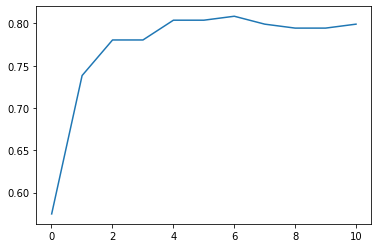

In [10]:
def questionb1():
    cost_list = np.linspace(0.01, 10, 11)
    score_list = []
    max_cost = 0.01
    max_score = 0.6215113920467946

    start_time = time.time()
    for i in cost_list:
        cost = round(i, 2)
        cv_level = 10
        svc = svm.SVC(C = cost, gamma = "auto")
        svc.fit(predictor_train, target_train)
        prediction = svc.predict(predictor_test)
        prediction = accuracy_score(target_test,prediction)
        print("Cost : " + str(cost) + ", Prediction : " + str(prediction))
#         score = cross_val_score(svc, predictor_train, target_train, cv= cv_level)
#         score = sum(score)/cv_level
        score_list.append(prediction)
#         print("Cost : " + str(cost) + ", Prediction : " + str(score))

        if prediction > max_score:
            max_score = prediction
            max_cost = i
    end_time = time.time()
    print("Elapsed Time = " + str( end_time - start_time ))
    print("Max Score " + str(max_score) + " , max_cost " + str(max_cost ))
    plt.savefig("all_auto_radial.png")
    plt.plot(cost_list, score_list)
    
questionb1()
    
    

Cost : 0.01, Prediction : 0.5747663551401869 <br>
Cost : 1.01, Prediction : 0.7383177570093458<br>
Cost : 2.01, Prediction : 0.780373831775701<br>
Cost : 3.01, Prediction : 0.780373831775701<br>
Cost : 4.01, Prediction : 0.8037383177570093<br>
Cost : 5.0, Prediction : 0.8037383177570093<br>
Cost : 6.0, Prediction : 0.8084112149532711<br>
Cost : 7.0, Prediction : 0.7990654205607477<br>
Cost : 8.0, Prediction : 0.794392523364486<br>
Cost : 9.0, Prediction : 0.794392523364486<br>
Cost : 10.0, Prediction : 0.7990654205607477<br>
Elapsed Time = 0.35118556022644043<br>
Max Score 0.8084112149532711 , max_cost 6.004<br>


Cost : 0.01, Prediction : 0.8644859813084113
Cost : 1.01, Prediction : 0.8598130841121495
Cost : 2.01, Prediction : 0.8457943925233645
Cost : 3.01, Prediction : 0.8598130841121495
Cost : 4.01, Prediction : 0.8457943925233645
Cost : 5.0, Prediction : 0.8598130841121495
Cost : 6.0, Prediction : 0.8457943925233645
Cost : 7.0, Prediction : 0.8598130841121495
Cost : 8.0, Prediction : 0.8691588785046729
Cost : 9.0, Prediction : 0.8457943925233645
Cost : 10.0, Prediction : 0.8598130841121495
Elapsed Time = 28.90213131904602
Max Score 0.8691588785046729 , max_cost 8.002


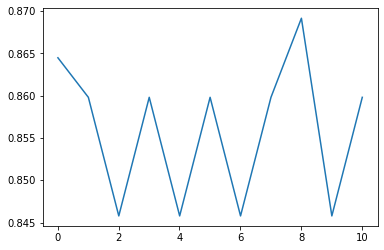

In [20]:
def questionb2():
    
    cost_list = np.linspace(0.01, 10, 11)
    score_list = []
    max_cost = 0.01
    max_score = 0.6215113920467946

    start_time = time.time()
    for i in cost_list:
        cost = round(i, 2)
        cv_level = 10
        svc = svm.SVC(C = cost, gamma = "auto", kernel = "poly", degree = 2 )
        svc.fit(predictor_train, target_train)
        prediction = svc.predict(predictor_test)
        prediction = accuracy_score(target_test,prediction)
        print("Cost : " + str(cost) + ", Prediction : " + str(prediction))
#         score = cross_val_score(svc, predictor_train, target_train, cv= cv_level)
#         score = sum(score)/cv_level
        score_list.append(prediction)
#         print("Cost : " + str(cost) + ", Prediction : " + str(score))

        if prediction > max_score:
            max_score = prediction
            max_cost = i
    
    end_time = time.time()
    print("Elapsed Time = " + str(  end_time - start_time))
    print("Max Score " + str(max_score) + " , max_cost " + str(max_cost ))
    plt.plot(cost_list, score_list)
    plt.savefig("poly_deg2.png")
    
questionb2()
    
    

Cost : 0.01, Prediction : 0.8644859813084113<br>
Cost : 1.01, Prediction : 0.8598130841121495<br>
Cost : 2.01, Prediction : 0.8457943925233645<br>
Cost : 3.01, Prediction : 0.8598130841121495<br>
Cost : 4.01, Prediction : 0.8457943925233645<br>
Cost : 5.0, Prediction : 0.8598130841121495<br>
Cost : 6.0, Prediction : 0.8457943925233645<br>
Cost : 7.0, Prediction : 0.8598130841121495<br>
Cost : 8.0, Prediction : 0.8691588785046729<br>
Cost : 9.0, Prediction : 0.8457943925233645<br>
Cost : 10.0, Prediction : 0.8598130841121495<br>
Elapsed Time = 28.8676016330719<br>
Max Score 0.8691588785046729 , max_cost 8.002<br>

Cost : 0.01, Prediction : 0.7897196261682243
Cost : 1.01, Prediction : 0.8785046728971962
Cost : 2.01, Prediction : 0.8598130841121495
Cost : 3.01, Prediction : 0.8551401869158879
Cost : 4.01, Prediction : 0.8551401869158879
Cost : 5.0, Prediction : 0.8551401869158879
Cost : 6.0, Prediction : 0.8504672897196262
Cost : 7.0, Prediction : 0.8551401869158879
Cost : 8.0, Prediction : 0.8457943925233645
Cost : 9.0, Prediction : 0.8457943925233645
Cost : 10.0, Prediction : 0.8411214953271028
Elapsed Time = 2.1980247497558594
Max Score 0.8785046728971962 , max_cost 1.009


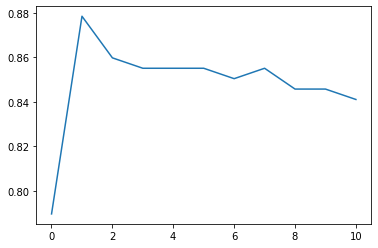

In [21]:
def questionb3_linear_kernel():
    
    cost_list = np.linspace(0.01, 10, 11)
    score_list = []
    max_cost = 0.01
    max_score = 0.6215113920467946

    start_time = time.time()
    for i in cost_list:
        cost = round(i, 2)
        cv_level = 10
        svc = svm.SVC(C = cost, kernel = "linear" )
        svc.fit(predictor_train, target_train)
        prediction = svc.predict(predictor_test)
        prediction = accuracy_score(target_test,prediction)
        print("Cost : " + str(cost) + ", Prediction : " + str(prediction))
#         score = cross_val_score(svc, predictor_train, target_train, cv= cv_level)
#         score = sum(score)/cv_level
        score_list.append(prediction)
#         print("Cost : " + str(cost) + ", Prediction : " + str(score))

        if prediction > max_score:
            max_score = prediction
            max_cost = i
    
    end_time = time.time()
    print("Elapsed Time = " + str(  end_time - start_time))
    print("Max Score " + str(max_score) + " , max_cost " + str(max_cost ))
    plt.plot(cost_list, score_list)
    plt.savefig("linear.png")
    
questionb3_linear_kernel()
    
    

Cost : 0.01, Prediction : 0.7897196261682243<br>
Cost : 1.01, Prediction : 0.8785046728971962<br>
Cost : 2.01, Prediction : 0.8598130841121495<br>
Cost : 3.01, Prediction : 0.8551401869158879<br>
Cost : 4.01, Prediction : 0.8551401869158879<br>
Cost : 5.0, Prediction : 0.8551401869158879<br>
Cost : 6.0, Prediction : 0.8504672897196262<br>
Cost : 7.0, Prediction : 0.8551401869158879<br>
Cost : 8.0, Prediction : 0.8457943925233645<br>
Cost : 9.0, Prediction : 0.8457943925233645<br>
Cost : 10.0, Prediction : 0.8411214953271028<br>
Elapsed Time = 1.944648265838623<br>
Max Score 0.8785046728971962 , max_cost 1.009<br>

Cost : 0.01, Prediction : 0.6121495327102804
Cost : 1.01, Prediction : 0.6121495327102804
Cost : 2.01, Prediction : 0.6121495327102804
Cost : 3.01, Prediction : 0.6121495327102804
Cost : 4.01, Prediction : 0.6121495327102804
Cost : 5.0, Prediction : 0.6121495327102804
Cost : 6.0, Prediction : 0.6121495327102804
Cost : 7.0, Prediction : 0.6121495327102804
Cost : 8.0, Prediction : 0.6121495327102804
Cost : 9.0, Prediction : 0.6121495327102804
Cost : 10.0, Prediction : 0.6121495327102804
Elapsed Time = 0.27335691452026367
Max Score 0.6215113920467946 , max_cost 0.01


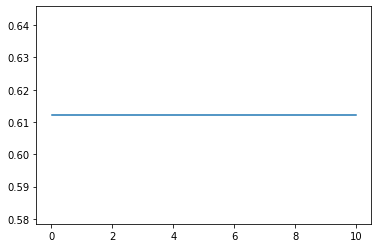

In [22]:
def questionb4_sigmoid():
    
    cost_list = np.linspace(0.01, 10, 11)
    score_list = []
    max_cost = 0.01
    max_score = 0.6215113920467946

    start_time = time.time()
    for i in cost_list:
        cost = round(i, 2)
        cv_level = 10
        svc = svm.SVC(C = cost, gamma = "auto", kernel = "sigmoid" )
        svc.fit(predictor_train, target_train)
        prediction = svc.predict(predictor_test)
        prediction = accuracy_score(target_test,prediction)
        print("Cost : " + str(cost) + ", Prediction : " + str(prediction))
#         score = cross_val_score(svc, predictor_train, target_train, cv= cv_level)
#         score = sum(score)/cv_level
        score_list.append(prediction)
#         print("Cost : " + str(cost) + ", Prediction : " + str(score))

        if prediction > max_score:
            max_score = prediction
            max_cost = i
    
    end_time = time.time()
    print("Elapsed Time = " + str(  end_time - start_time))
    print("Max Score " + str(max_score) + " , max_cost " + str(max_cost ))
    plt.plot(cost_list, score_list)
    plt.savefig("sigmoid.png")
    
questionb4_sigmoid()
    
    

Cost : 0.01, Prediction : 0.6121495327102804<br>
Cost : 1.01, Prediction : 0.6121495327102804<br>
Cost : 2.01, Prediction : 0.6121495327102804<br>
Cost : 3.01, Prediction : 0.6121495327102804<br>
Cost : 4.01, Prediction : 0.6121495327102804<br>
Cost : 5.0, Prediction : 0.6121495327102804<br>
Cost : 6.0, Prediction : 0.6121495327102804<br>
Cost : 7.0, Prediction : 0.6121495327102804<br>
Cost : 8.0, Prediction : 0.6121495327102804<br>
Cost : 9.0, Prediction : 0.6121495327102804<br>
Cost : 10.0, Prediction : 0.6121495327102804<br>
Elapsed Time = 0.23919153213500977<br>
Max Score 0.6215113920467946 , max_cost 0.01<br>
